In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
benefits = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_benefits.csv")
company_industries = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_com_industry.csv")
company_speciality = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_com_speciality.csv")
companies = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_company.csv")
employee_counts = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_employee_counts.csv")
industry = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_industry.csv")
job_industry = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_job_industry.csv")
job_skills = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_job_skills.csv")
postings = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_postings.csv")
salaries = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_salary.csv")
skills = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_5_Linkedin-Finished\cleaned_skills.csv")

Question1.	What is the distribution of company sizes (small, medium, large)? 

In [ ]:
size_map = {
    0: 'Small',
    1: 'Small',
    2: 'Small',
    3: 'Medium',
    4: 'Medium',
    5: 'Large',
    6: 'Large',
    7: 'Large'
}

In [ ]:
companies['size_category'] = companies['company_size'].map(size_map).fillna('Unknown')
size_distribution = companies['size_category'].value_counts().sort_index()
size_distribution

size_category
Large      6954
Medium     5441
Small      9304
Unknown    2774
Name: count, dtype: int64


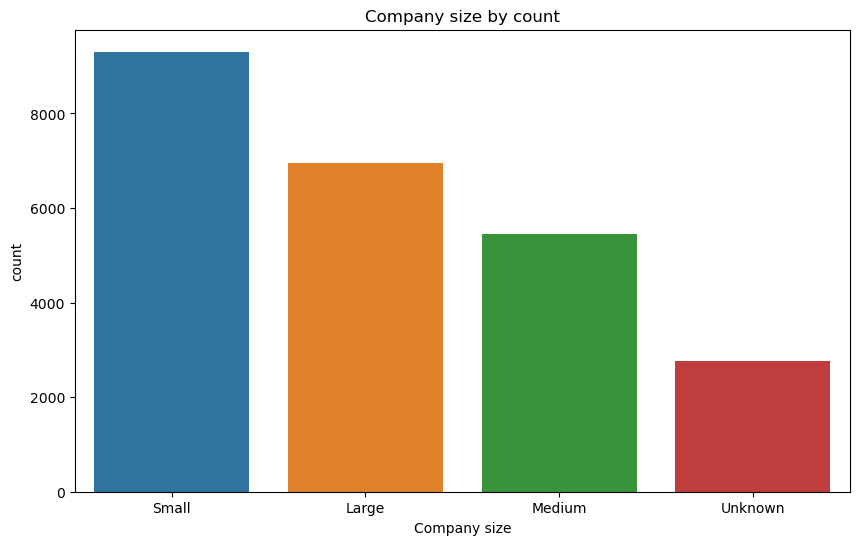

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=size_distribution.sort_values(ascending=False).index, y=size_distribution.sort_values(ascending=False).values)
plt.title('Company size by count')
plt.xlabel('Company size')
plt.ylabel('count')
plt.show()

Question2.	Which countries have the most companies listed?

In [25]:
top10_countries_by_company_count = companies.groupby('country')['company_id'].count().sort_values(ascending=False).head(10)
top10_countries_by_company_count

country
US    21635
0       727
GB      620
CA      258
IN      157
DE      128
FR      118
CH       93
AU       73
NL       64
Name: company_id, dtype: int64


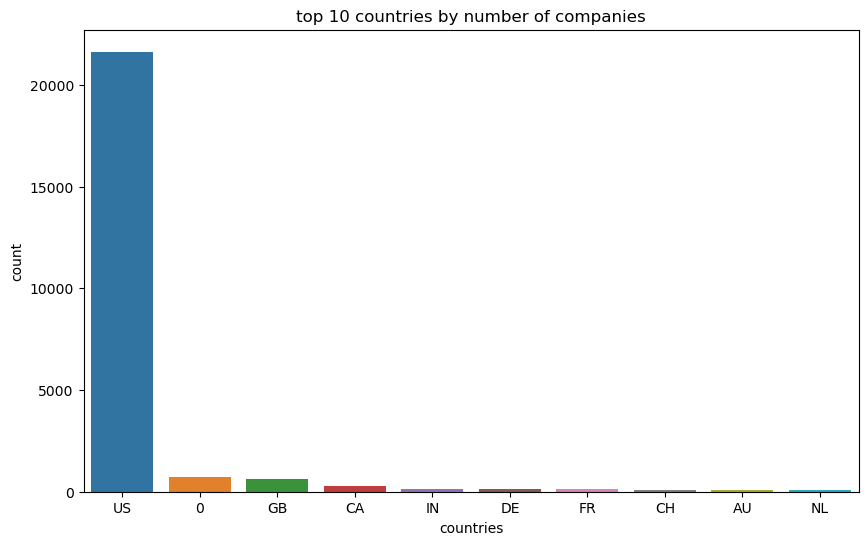

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_countries_by_company_count.index, y=top10_countries_by_company_count.sort_values(ascending=False).values)
plt.title('top 10 countries by number of companies')
plt.xlabel('countries')
plt.ylabel('count')
plt.show()

Question3.	What are the top 10 most common industries companies belong to?

In [26]:
top10_industries_by_Number_of_companies = company_industries.groupby('industry')['company_id'].count().sort_values(ascending=False).head(10)
top10_industries_by_Number_of_companies

industry
Staffing and Recruiting             2387
IT Services and IT Consulting       2130
Hospitals and Health Care           1673
Software Development                1439
Financial Services                   986
Construction                         752
Advertising Services                 624
Non-profit Organizations             617
Real Estate                          545
Business Consulting and Services     498
Name: company_id, dtype: int64


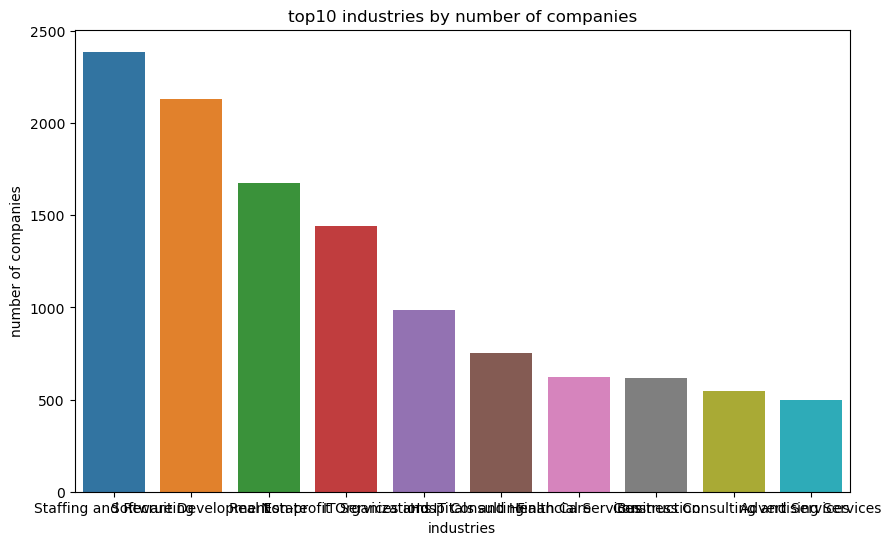

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_industries_by_Number_of_companies.index.sort_values(ascending=False), y=top10_industries_by_Number_of_companies.values)
plt.title('top10 industries by number of companies')
plt.xlabel('industries')
plt.ylabel('number of companies')
plt.show()

Question4.	What are the most frequent specialties companies mention?

In [3]:
speciality_frequency = company_speciality.groupby('speciality')['company_id'].count().sort_values(ascending=False).head(10)
speciality_frequency

speciality
Engineering               601
Recruiting                581
Staffing                  578
Technology                529
Consulting                491
Healthcare                445
Manufacturing             419
Marketing                 416
Project Management        379
Information Technology    376
Name: company_id, dtype: int64

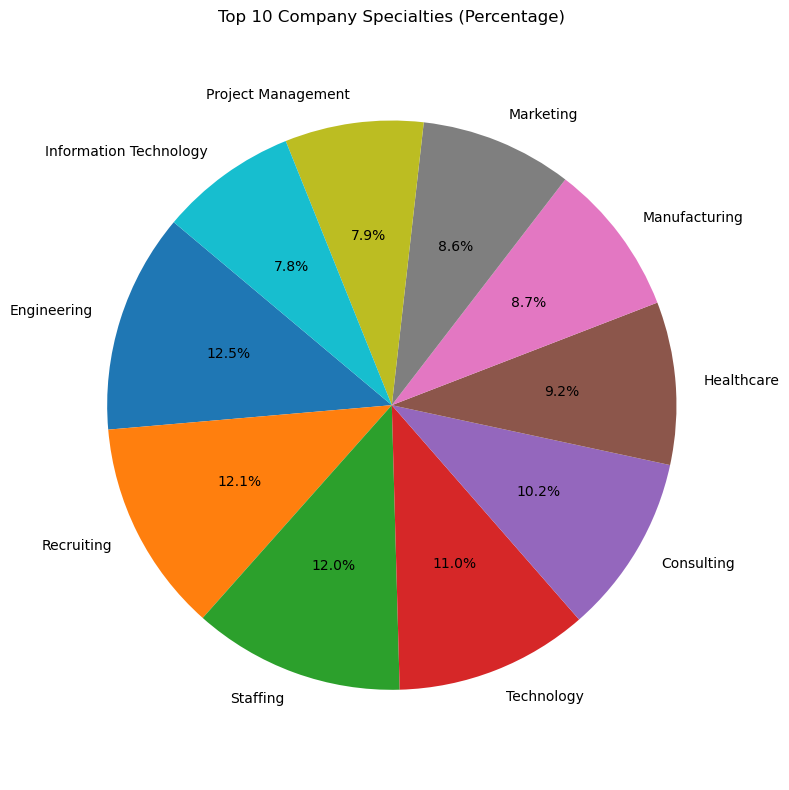

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(speciality_frequency.values, labels=speciality_frequency.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Company Specialties (Percentage)")
plt.axis('equal')
plt.tight_layout()
plt.show()


Question5.	Which cities have the highest average company size?

In [76]:
medium_companies = companies[companies['company_size_category'] == 'Medium']
medium_company_counts_by_top10_city = medium_companies.groupby('city').size().sort_values(ascending=False).head(10)

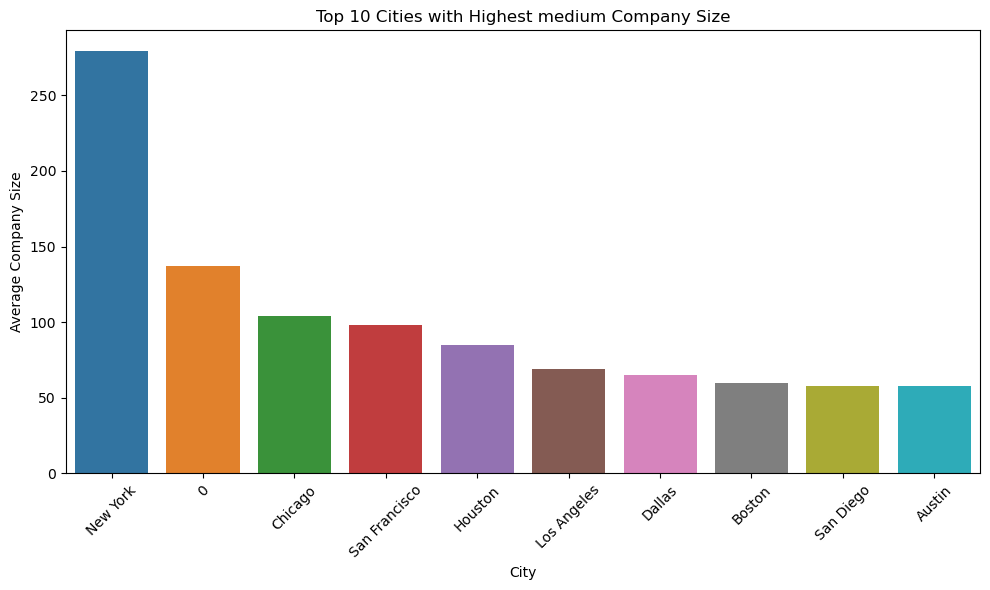

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=medium_company_counts_by_top10_city.index, y=medium_company_counts_by_top10_city.values)
plt.title('Top 10 Cities with Highest medium Company Size')
plt.xlabel('City')
plt.ylabel('Average Company Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question6.	How has the number of employees at companies changed over time? (from employee_counts)

In [ ]:
employee_counts['date_recorded'] = pd.to_datetime(employee_counts['time_recorded'], unit='s')
employee_trend = employee_counts.groupby(employee_counts['date_recorded'].dt.to_period('D'))['employee_count'].mean()

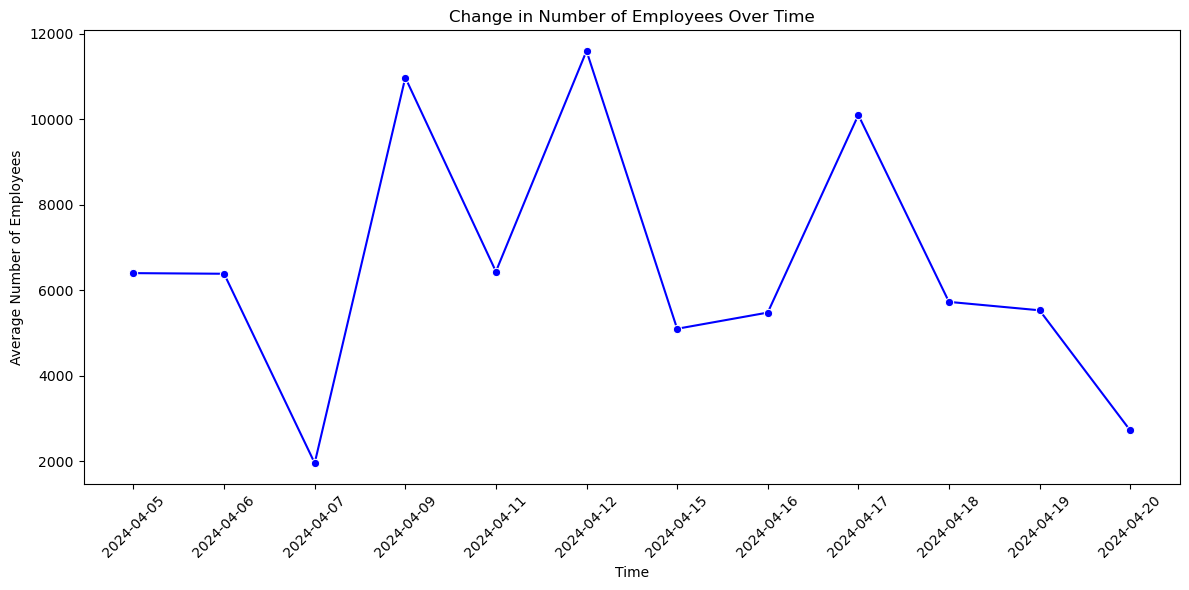

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=employee_trend.index.astype(str), y=employee_trend.values, marker='o', color='b')
plt.title('Change in Number of Employees Over Time')
plt.xlabel('Time')
plt.ylabel('Average Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question7.	Which companies have the highest follower counts?

In [28]:
top10_companies_with_follower_count = employee_counts.groupby('company_id')['follower_count'].sum().sort_values(ascending=False).head(10)
top10_companies_with_follower_count

company_id
1586    307797532
1035    177598369
1441    163302711
1353    162664453
1337    131036038
1038    106155677
1318     87031100
1033     83182615
3486     79509617
1431     71485536
Name: follower_count, dtype: int64

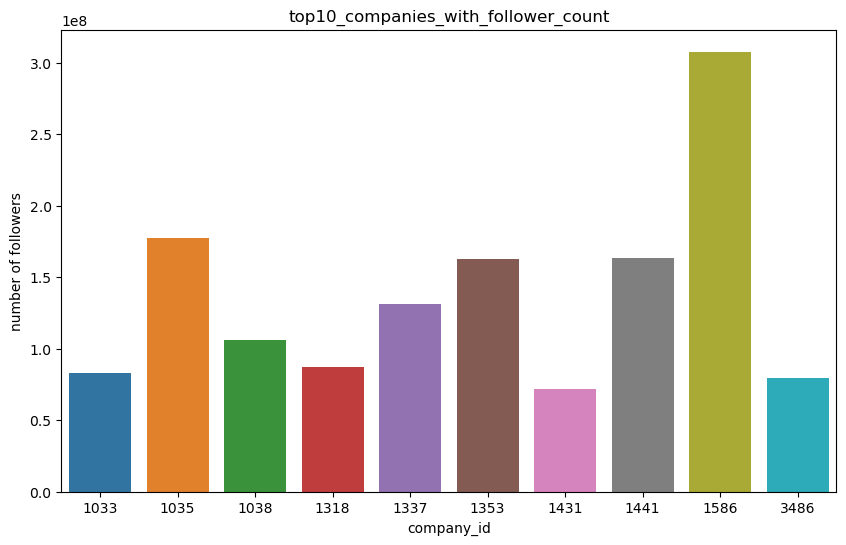

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_companies_with_follower_count.index, y=top10_companies_with_follower_count.values)
plt.title('top10_companies_with_follower_count')
plt.ylabel('number of followers')
plt.xlabel('company_id')
plt.show()

Question8.	How does the average salary vary by job title?

In [26]:
avg_salary_by_title = postings.groupby("title")['med_salary'].mean().sort_values(ascending=False).head(10)
avg_salary_by_title

title
Senior Sales Account Executive - Enterprise            750000.0
Oral Surgeon - DDS/DMD                                 750000.0
Orthopedic Surgeon                                     680000.0
Hematology / Oncology                                  550000.0
Non-Invasive Cardiology Physician                      541000.0
Stanford Cardiology, Electrophysiology                 525000.0
Physician - ENT-Otolaryngology                         500000.0
Regional Director Design - Architecture                500000.0
Underwriting Technician, National Accounts Casualty    500000.0
Anesthesiologist                                       500000.0
Name: med_salary, dtype: float64

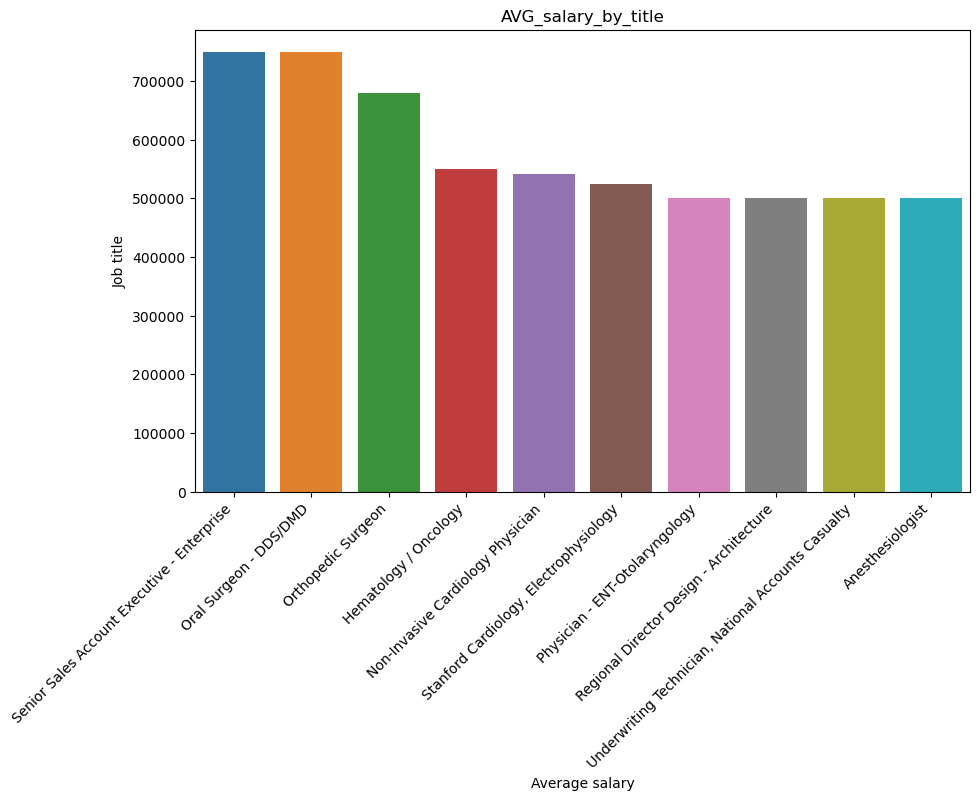

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_title.index, y=avg_salary_by_title.values)
plt.title('AVG_salary_by_title')
plt.ylabel('Job title')
plt.xlabel('Average salary')
plt.xticks(rotation=45, ha='right')
plt.show()

Question9.	What percentage of job postings allow remote work?

In [36]:
#remote_allowed column дотор 1 утгатай бол зөвшөөрсөн гэсэн үг ба blank байгаа нь зөвшөөрөөгүй гэсэн үг.
total_postings = len(postings)
remote_postings = postings['remote_allowed'].sum()
remote_percentage = (remote_postings / total_postings) * 100
remote_percentage

13.37233833084864

Question10.	What is the average number of applies and views per job posting?

In [41]:
average_applies = postings['applies'].mean()
average_views = postings['views'].mean()

print(f"Average number of applies per job posting: {average_applies:.2f}")
print(f"Average number of views per job posting: {average_views:.2f}")

Average number of applies per job posting: 11.69
Average number of views per job posting: 19.64


Question11.	How long are jobs typically open before they are closed?

In [ ]:
postings['open_duration'] = (postings['closed_time'] - postings['listed_time']) / (60 * 60 * 24)
average_open_duration = postings['open_duration'].mean()
average_open_duration

-36162.85403050108

Question12.	What’s the distribution of jobs by pay period (hourly, yearly, etc.)?

In [51]:
pay_period_of_companies = salaries.groupby('pay_period')['job_id'].count().sort_values(ascending=False)
pay_period_of_companies

pay_period
YEARLY      23767
HOURLY      16289
MONTHLY       539
WEEKLY        180
BIWEEKLY        9
Name: job_id, dtype: int64

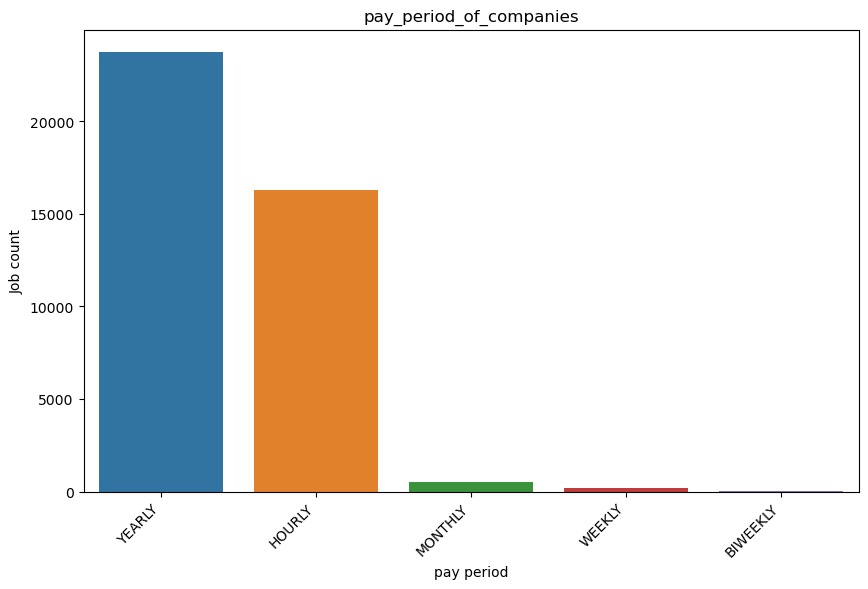

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=pay_period_of_companies.index, y=pay_period_of_companies.values)
plt.title('pay_period_of_companies')
plt.ylabel('Job count')
plt.xlabel('pay period')
plt.xticks(rotation=45, ha='right')
plt.show()

Question13.	Which cities or regions have the highest median salaries?

In [65]:
cities_with_highest_median_salary = postings.merge(companies[['company_id', 'city']], on='company_id', how='left')
cities_with_highest_median_salary = cities_with_highest_median_salary.merge(salaries[['job_id', 'med_salary']], on='job_id', how='left')
top10_cities_with_highest_median_salary = cities_with_highest_median_salary.groupby('city')['med_salary_x'].mean().sort_values(ascending=False).head(10)
top10_cities_with_highest_median_salary


city
Riverside                          317358.000000
Libertyville                       300000.000000
Corporate Headquarters: Bermuda    262621.000000
Ipswich                            250000.000000
Midvale                            230000.000000
Paoli                              220000.000000
Newark                             193338.943333
AUSTIN                             190000.000000
Walldorf                           189118.666667
Tustin                             185000.000000
Name: med_salary_x, dtype: float64

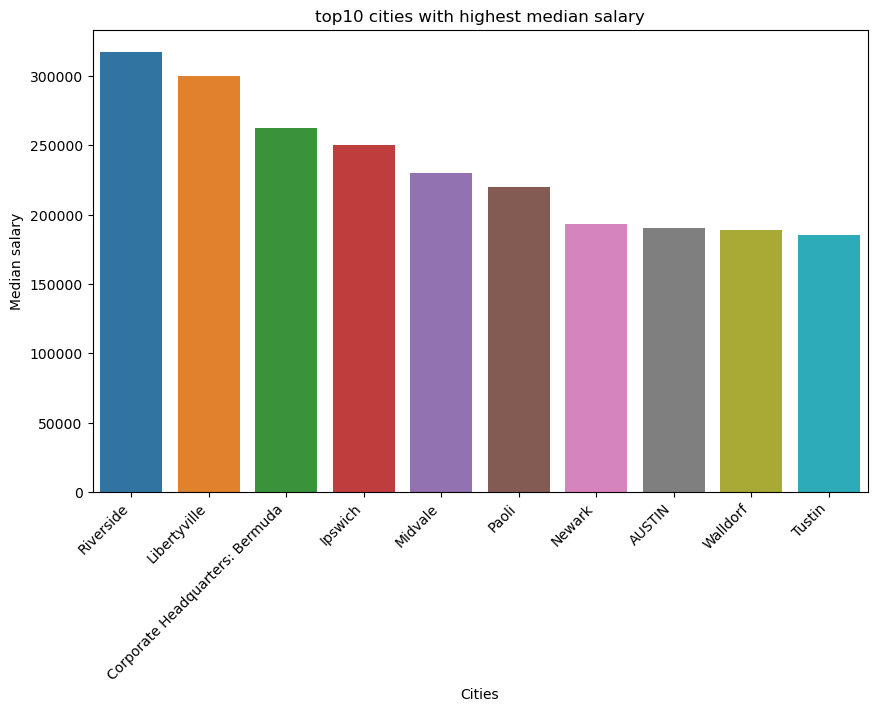

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_cities_with_highest_median_salary.index, y=top10_cities_with_highest_median_salary.values)
plt.title('top10 cities with highest median salary')
plt.ylabel('Median salary')
plt.xlabel('Cities')
plt.xticks(rotation=45, ha='right')
plt.show()

Question14.	What is the salary distribution (min, median, max)?

In [ ]:
def convert_to_yearly_salary(row):
    if row['pay_period'] == 'yearly':
        return row['med_salary']
    elif row['pay_period'] == 'monthly':
        return row['med_salary'] * 12
    elif row['pay_period'] == 'weekly':
        return row['med_salary'] * 52
    elif row['pay_period'] == 'biweekly':
        return row['med_salary'] * 26
    elif row['pay_period'] == 'hourly':
        return row['med_salary'] * 2080
    return row['med_salary']

postings['annualized_salary'] = postings.apply(convert_to_yearly_salary, axis=1)
salary_distribution = postings['annualized_salary'].agg(['min', 'median', 'max'])
salary_distribution

min            0.00
median        25.38
max       750000.00
Name: annualized_salary, dtype: float64

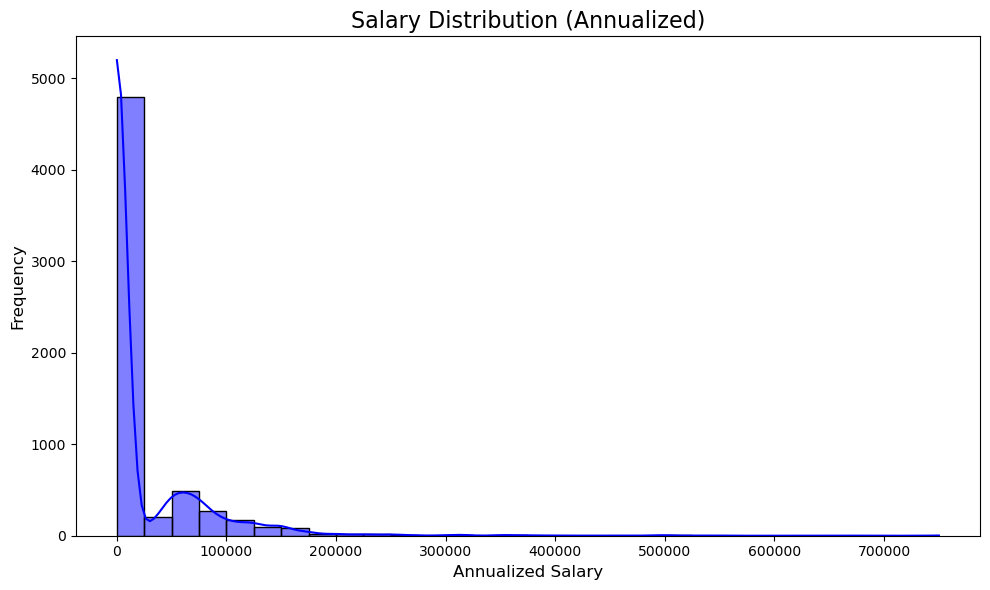

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(postings['annualized_salary'], kde=True, color='blue', bins=30)
plt.title('Salary Distribution (Annualized)', fontsize=16)
plt.xlabel('Annualized Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Question15.	How does salary vary across industries or job types?

In [60]:
avg_salary_by_industry = postings.merge(salaries[['job_id', 'med_salary']], on='job_id', how='left').merge(job_industry[['job_id', 'industry_id']], on='job_id', how='left')
avg_salary_by_industry = avg_salary_by_industry.merge(industry[['industry_id', 'industry_name']],on='industry_id', how='outer')
avg_salary_by_industry = avg_salary_by_industry.groupby('industry_name')['med_salary_x'].mean().sort_values(ascending=False).head(10)
avg_salary_by_industry

industry_name
Venture Capital and Private Equity Principals             155461.818182
Trusts and Estates                                        150000.000000
Real Estate Agents and Brokers                            150000.000000
Fire Protection                                           140125.650000
Graphic Design                                            133338.000000
Housing and Community Development                         130000.000000
Renewable Energy Equipment Manufacturing                  118666.666667
Engines and Power Transmission Equipment Manufacturing    112504.875000
Photography                                               105000.000000
Paint, Coating, and Adhesive Manufacturing                100010.666667
Name: med_salary_x, dtype: float64

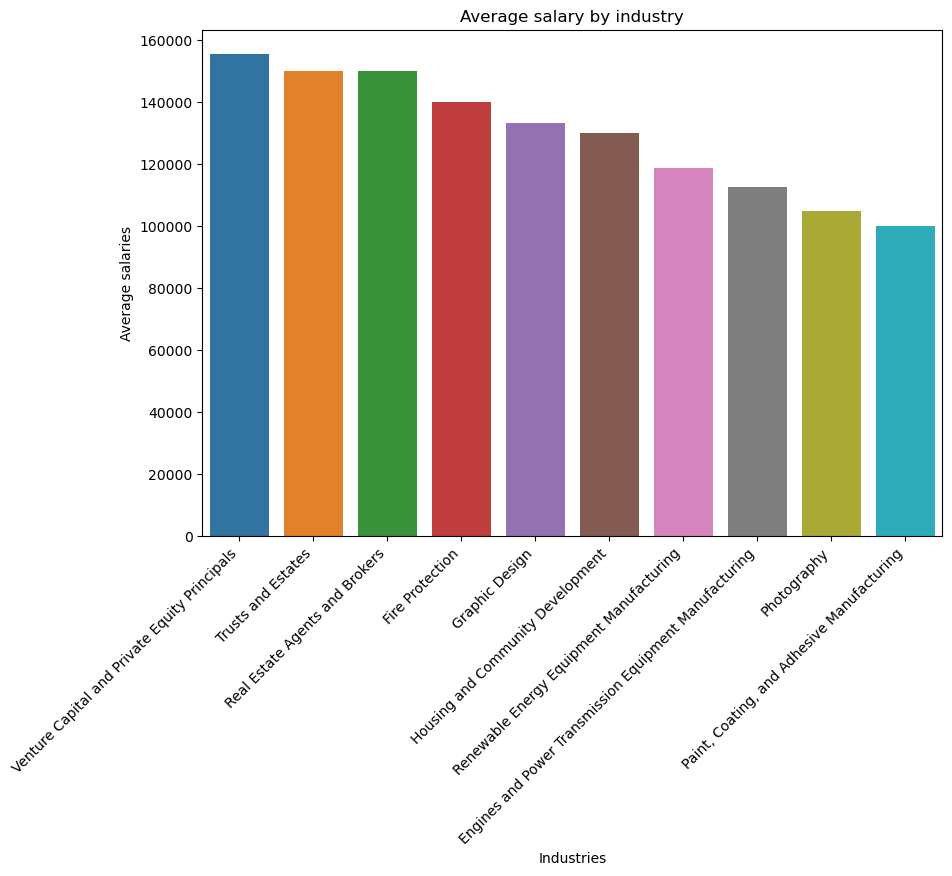

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_industry.index, y=avg_salary_by_industry.values)
plt.title('Average salary by industry')
plt.xlabel('Industries')
plt.ylabel('Average salaries')
plt.tight_layout()
plt.xticks(rotation = 45, ha='right')
plt.show()

Question16.	Is there a correlation between follower count and median salary?

In [ ]:
follower_salary_data = postings.merge(companies[['company_id', 'name']], on='company_id', how='left'
).merge(employee_counts[['company_id', 'follower_count']], on='company_id', how='left')

correlation = follower_salary_data[['follower_count', 'med_salary']].corr()
correlation 

,follower_count,med_salary
follower_count,1.00000,-0.00018
med_salary,-0.00018,1.00000


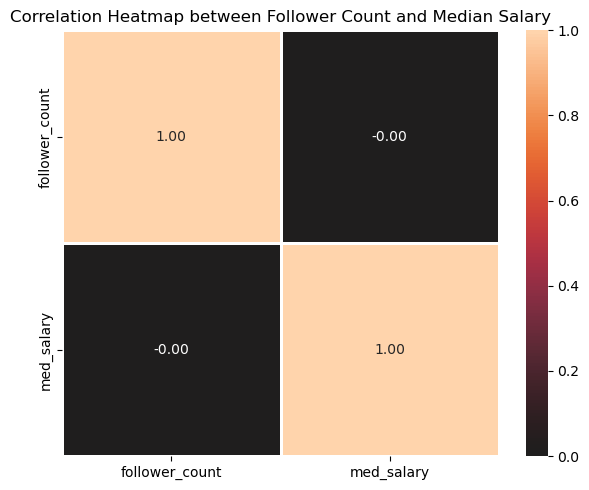

In [24]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap between Follower Count and Median Salary')
plt.tight_layout()
plt.show()

Question17.	What are the most in-demand skills based on job postings?

In [ ]:
skills_in_demand = postings.merge(job_skills[['job_id', 'skill_abr']], on='job_id', how='left')
skills_in_demand = skills_in_demand.merge(skills[['skill_abr', 'skill_name']], on='skill_abr', how='left')
most_in_demand_skills = skills_in_demand['skill_name'].value_counts().head(10)

print("Most In-Demand Skills:")
print(most_in_demand_skills)

Most In-Demand Skills:
skill_name
Information Technology    7108
Sales                     5559
Management                5432
Manufacturing             4609
Engineering               3749
Health Care Provider      3728
Other                     3390
Business Development      3332
Finance                   2894
Accounting/Auditing       2274
Name: count, dtype: int64


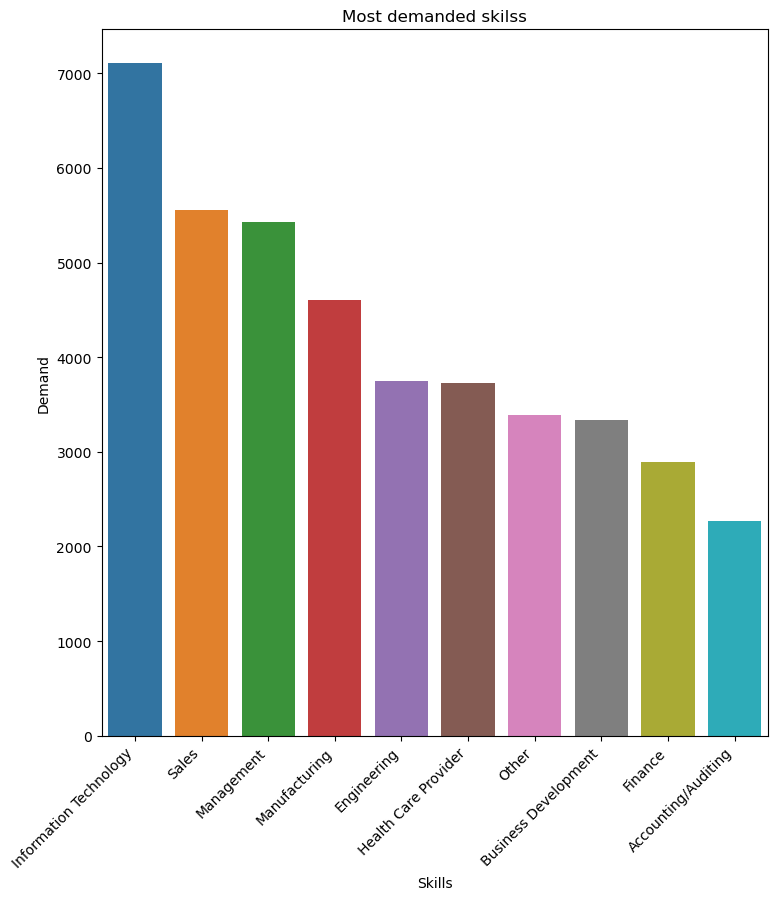

In [19]:
plt.figure(figsize=(8,8))
sns.barplot(x=most_in_demand_skills.index, y=most_in_demand_skills.values)
plt.title('Most demanded skilss')
plt.xlabel('Skills')
plt.ylabel('Demand')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

Question18.	Which industries require the most diverse skill sets per job?

In [ ]:
skills_per_industry = job_skills.merge(
    job_industry[['job_id', 'industry_id']], 
    on='job_id', 
    how='left'
).merge(
    industry[['industry_id', 'industry_name']], 
    on='industry_id', 
    how='left'
)

unique_skills_per_industry = skills_per_industry.groupby('industry_name')['skill_abr'].nunique().sort_values(ascending=False)

print("Industries Requiring the Most Diverse Skill Sets:")
print(unique_skills_per_industry.head(10))

Industries Requiring the Most Diverse Skill Sets:
industry_name
IT Services and IT Consulting        35
Software Development                 35
Retail                               35
Hospitals and Health Care            35
Construction                         35
Technology, Information and Media    35
Pharmaceutical Manufacturing         35
Biotechnology Research               35
Staffing and Recruiting              35
Manufacturing                        35
Name: skill_abr, dtype: int64
